# King County Housing Data - Linear Regression Assignment

Data for this assignment was obtained from Kaggle: <https://www.kaggle.com/harlfoxem/housesalesprediction>

Complete the following challenges below to improve iteratively your home price estimation and practice implementing predictive linear regression models. 

# Bivariate Regression

Pick the X variable that you think will be the most correlated with Y. 

Split your dataset into a 20-80 train-test-split (80% of data for training, and 20% for testing).

Train a regression model using this single X and single Y variable. Once you have trained the model and obtained its coefficients, plot the points on a graph and fit your line of best fit to the graph.

Report your Root Mean Squared Error and R-Squared for this model.



In [0]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/kc_house_data.csv')
pd.set_option('display.max_columns', 100)
print(df.shape)
df.head()

(21613, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [0]:
# Pick x variable that will be most corr with y
df.corr()

In [5]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [0]:
# Setting up correlated variables
target = ['price']
predictor = ['sqft_living']

In [7]:
# Grabbing the values from Price and Sqft Living
y = df[target].values
x = df[predictor].values

# Split dataset into 80% training and 20% testing
# Randomly splitting values into training and testing subsets
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.80, test_size=0.20, random_state=42)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(17290, 1) (4323, 1) (17290, 1) (4323, 1)


In [8]:
# Defining what model we would like to create
model_1 = LinearRegression()
# Fitting our prepared data to the model
model_1.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [9]:
 # Gives the estimated intercepts
b_o = model_1.intercept_
# Gives the coefficents
b_i = model_1.coef_[0]

print('Intercepts:', b_o)
print('Coef:', b_i)

Intercepts: [-41999.18603994]
Coef: [279.55477932]


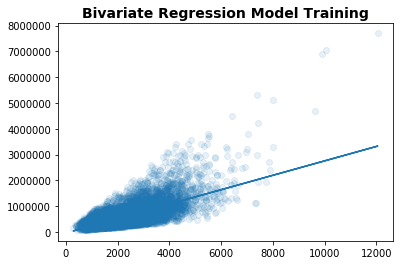

In [10]:
# Setting up the scatter data
plt.scatter(x_train, y_train, alpha=0.1)

# Plotting our line of regression as y = b_o + b_1* x
plt.plot(x_train, [b_o + b_i * _ for _ in x_train])

# Title
plt.title('Bivariate Regression Model Training', fontsize=(14), fontweight='semibold');

In [0]:
y_test_predict = model_1.predict(x_test)
# Mean Squared Error
mse = mean_squared_error(y_test, y_test_predict)
# Root Mean Squared Error
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
# R-Squared
r2 = r2_score(y_test, y_test_predict)

In [12]:
# Report Root Mean Squared Error
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)

Mean Squared Error: 76484977061.77612
Root Mean Squared Error: 276559.1746114674


In [13]:
# Report R Squared
print('R Squared:', r2)

R Squared: 0.49406905389089006


In [14]:
# Why is it different when I run it like this?
r2_score(y_true=df[target], y_pred=df[predictor])

-2.144150279548578

# Two-variable Multiple Regression

To ramp up slowly, pick a second X variable that you think will be the most correlated with Y. 

Split your dataset into a 80-20 train-test-split (80% of data for training, and 20% for testing).

Train a regression model using these two X variables. Once you have trained the model and obtained its coefficients, plot the points on a graph and fit your **plane** of best fit to the graph.

Report your Root Mean Squared Error and R-squared for this model.

In [0]:
# Pick a second X variable 
target2 = ['price']
predictors2 = ['sqft_living', 'grade']

y2 = df[target2].values
x2 = df[predictors2].values

In [0]:
# Split your ds into 80% training 20% testing
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, train_size=0.80, test_size=0.2, random_state=42)

In [17]:
# Train a RM using the 2 X variables 
model_2 = LinearRegression()
model_2.fit(x2_train, y2_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [18]:
# Obtain coef & intercept
b_o2 = model_2.intercept_
# Gives the coefficents
b_i2 = model_2.coef_[0]

print('Intercepts:', b_o2)
print('Coef:', b_i2)

Intercepts: [-582887.80204686]
Coef: [  185.10393866 96261.37224464]


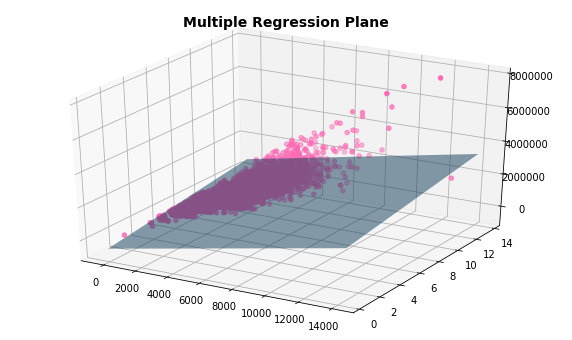

In [20]:
# Plot
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')

# Scatter 
ax.scatter(df['sqft_living'], df['grade'], df['price'],c='hotpink')

# Set axes
x1 = np.array(ax.get_xlim())
y1 = np.array(ax.get_ylim())
xx, yy = np.meshgrid(x1,y1)
zz = b_i2[0]*xx + b_i2[1]*yy + b_o2[0]

# Plane
plt3d = plt.gca(projection='3d')

# Opacity
plt3d.plot_surface(xx, yy, zz,alpha=0.5)

# Title
plt.title("Multiple Regression Plane", fontsize=(14), fontweight='semibold')

plt.show();


In [0]:
y_test_predict2 = model_2.predict(x2_test)
# Mean Squared Error
mse2 = mean_squared_error(y2_test, y_test_predict2)
# Root Mean Squared Error
rmse2 = (np.sqrt(mean_squared_error(y2_test, y_test_predict2)))
# R-Squared
r22 = r2_score(y2_test, y_test_predict2)

In [22]:
print('Mean Squared Error:', mse2)

Mean Squared Error: 69834518251.59692


In [23]:
# RMSE
print('Root Mean Squared Error:', rmse2)

Root Mean Squared Error: 264262.2149524917


In [24]:
# R^2
print('R Squared:', r22)

R Squared: 0.5380603453464137


# Multiple Regression

Now using all available X variables, split your data into test and training datasets, train your model, obtain its coefficients, and report the Root Mean Squared Error and R-squared values.

In [0]:
# All available x variables
x3 = df.drop(columns=['id','date','price'])
y3 = df['price']

x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y3, train_size=0.08, test_size=0.02, random_state=42)

In [35]:
# Fitting and Training Model
model_3 = LinearRegression()
model_3.fit(x3_train,y3_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [38]:
# Intercept and coef
b_o3 = model_3.intercept_
b_i3 = model_3.coef_

print('Intercept:', b_o3)
print('Coef:', b_i3)

Intercept: 8386766.805703623
Coef: [-3.43348598e+04  7.41531263e+03  1.16258905e+02  1.66460053e-01
  1.28618161e+04  5.30349387e+05  5.62862954e+04  3.45252776e+04
  1.13158565e+05  6.58018237e+01  5.04570815e+01 -2.15238219e+03
  2.80440591e+01 -7.55827812e+02  6.02896240e+05 -3.31528417e+05
  2.21795937e+01 -2.67570445e-01]


In [0]:
y3_test_pred = model_3.predict(x3_test)

In [49]:
# Rmse
rmse3 = (np.sqrt(mean_squared_error(y3_test,y3_test_pred)))
print('Root Mean Squared Error:', rmse3)

Root Mean Squared Error: 216374.6521749202


In [51]:
#r2
r23 = r2_score(y_true=y3_test,y_pred=y3_test_pred)
print('R-Squared:', r23)

R-Squared: 0.6876797497339391


# Stretch Goals

Pick from these stretch goals the tasks that you feel like will be the most beneficial for you. 

- Start to research Polynomial Regression and Log-Linear Regression (tomorrow's topics). Find a new regression dataset and try to implement one of these models. 
- Research "Feature Engineering" see what features you can engineer on the above dataset. How much are you able to improve your accuracy with feature engineering?
- Explore the concept of $R^2$, learn how it is calculated and how it relates to covariance, correlation, and variance. 
- Further explore the concept of "Model Validation" - we'll spend a whole week on this soon. What other measures of model accuracy could we have used besides Root Mean Squared Error?
- AMES Housing Prediction Kaggle Competition: <https://www.kaggle.com/c/house-prices-advanced-regression-techniques>
- **WRITE A BLOG POST** explaining the basics of Linear Regression.

Remember to share your findings in the slack channel. :)
